# Capstone Project - The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)



## Introduction: Business Problem <a name="introduction"></a>

When looking for a place to live, a person's decision of whether or not to select a house is based on its rent, as well as on the availability of various services close to the place. If all the amenities are present in a short enough radius, the person may accept a slightly higher rent. On the other hand, if there are no services nearby, they will have a hard time choosing the house.

This project focuses on finding the rent score and service score of various localities in Bangalore, India, to calculate the cost-effectiveness and create a matrix to determine which area has the best service to rent ration. We also aim to compare the rent and service venue density to find if there is a co-relation that will support the introductory statement that the rent depends on the services available.

## Data <a name="data"></a>

In [2]:
# imports

import pandas as pd
pd.set_option('display.max_rows', None)

import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup

import json

import requests
from pandas.io.json import json_normalize

import sklearn

In [3]:
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

!conda install -c conda-forge folium=0.5.0 --yes
import folium

print("Done")

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0          conda-forge
    geopy:           

ModuleNotFoundError: No module named 'folium'

### Fetching Rent Data

In [36]:
#source for rent data

page_1 = requests.get('https://www.makaan.com/price-trends/property-rates-for-rent-in-bangalore?page=1').text
soup = BeautifulSoup(page_1,'lxml')

t1 = soup.find('table',{'class':'tbl'}) #finding the table in the page

page_2 = requests.get('https://www.makaan.com/price-trends/property-rates-for-rent-in-bangalore?page=2').text
soup = BeautifulSoup(page_2,'lxml')

t2 = soup.find('table',{'class':'tbl'}) #finding the table in the page

page_3 = requests.get('https://www.makaan.com/price-trends/property-rates-for-rent-in-bangalore?page=3').text
soup = BeautifulSoup(page_3,'lxml')

t3 = soup.find('table',{'class':'tbl'}) #finding the table in the page

In [65]:
# Putting data in a dataframe

region = []
rate_1bhk = []
rate_2bhk = []
rate_3bhk = []


for t in [t1,t2,t3]:
    
    i = 3#skipping the first three header rows
    
    for r in t.find_all("tr"):

        if i>0:
            i = i-1
            pass

        else:
            try:
                region.append(r.find("td").text[0:])
                rate_1bhk.append(r.find("td").find_next("td").find_next("td").text[0:])
                rate_2bhk.append(r.find("td").find_next("td").find_next("td").find_next("td").find_next("td").text)
                rate_3bhk.append(r.find("td").find_next("td").find_next("td").find_next("td").find_next("td").find_next("td").find_next("td").text)
            except:
                pass

df = pd.DataFrame() #creating dataframe and adding columns
df["Locality"] = region
df["1 BHK Avg Rent"] = rate_1bhk
df["2 BHK Avg Rent"] = rate_2bhk
df["3 BHK Avg Rent"] = rate_3bhk

In [6]:
df.shape

(180, 4)

In [66]:
df = df[df["1 BHK Avg Rent"] != '-']
df = df[df["2 BHK Avg Rent"] != '-']
df = df[df["3 BHK Avg Rent"] != '-']

In [8]:
df.shape

(134, 4)

In [67]:
df.reset_index(drop=True,inplace=True)
df

,Locality,1 BHK Avg Rent,2 BHK Avg Rent,3 BHK Avg Rent
0,HSR Layout,"17,662.94","26,700","58,46.51"
1,Koramangala,"17,144.21","29,525.64","53,621.62"
2,Whitefield,"13,416.07","18,346.65","37,33.33"
3,Krishnarajapura,"13,212.5","15,176.47","60,500"
4,Begur,"9,600","14,681.25","22,100"
5,Varthur,"8,787","14,400","74,000"
6,Devanahalli,"18,000","15,285.71","22,000"
7,Chandapura,"9,120","11,466.67","16,000"
8,Mahadevapura,"11,205.26","17,521.43","35,000"
9,Whitefield Hope Farm Junction,"9,250","16,000","36,580.77"


### Fetching Location Data

In [68]:
latitude = []
longitude = []
geolocator = Nominatim(user_agent="Exploring_Bangalore")


for locality in (df["Locality"]):
    
    address = locality+',Bangalore, India'

    try:
        location = geolocator.geocode(address)
        latitude.append(location.latitude)
        longitude.append(location.longitude)
    except:
        latitude.append(np.nan)
        longitude.append(np.nan)
    
df["Latitude"] = latitude
df["Longitude"] = longitude

df.head()

,Locality,1 BHK Avg Rent,2 BHK Avg Rent,3 BHK Avg Rent,Latitude,Longitude
0,HSR Layout,"17,662.94","26,700","58,46.51",12.911623,77.638862
1,Koramangala,"17,144.21","29,525.64","53,621.62",13.292399,77.751926
2,Whitefield,"13,416.07","18,346.65","37,33.33",12.969637,77.749745
3,Krishnarajapura,"13,212.5","15,176.47","60,500",NaN,NaN
4,Begur,"9,600","14,681.25","22,100",12.863389,77.613011


Now, again, I encountered some rows that did not have the required values. So I removed the rows with NaN location values, and reset the index.

In [69]:
df = df[df["Latitude"].notna()]
df.reset_index(drop=True,inplace=True)
df

,Locality,1 BHK Avg Rent,2 BHK Avg Rent,3 BHK Avg Rent,Latitude,Longitude
0,HSR Layout,"17,662.94","26,700","58,46.51",12.911623,77.638862
1,Koramangala,"17,144.21","29,525.64","53,621.62",13.292399,77.751926
2,Whitefield,"13,416.07","18,346.65","37,33.33",12.969637,77.749745
3,Begur,"9,600","14,681.25","22,100",12.863389,77.613011
4,Varthur,"8,787","14,400","74,000",12.940615,77.746994
5,Devanahalli,"18,000","15,285.71","22,000",13.248350,77.713438
6,Chandapura,"9,120","11,466.67","16,000",12.800444,77.706283
7,Mahadevapura,"11,205.26","17,521.43","35,000",12.993498,77.692416
8,Budigere Cross,"22,000","19,000","19,500",13.046410,77.750307
9,Bellandur,"15,38.46","19,200","55,000",12.979120,77.591300


### Adding Foursquare Data

In [43]:
# Defining Foursquare Credentials

CLIENT_ID = '' # Foursquare ID
CLIENT_SECRET = '' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

#### Checking Amenities Around First Area

In [13]:
#Details of first Neighborhood

neighbor_lat = df.loc[0, 'Latitude']
neighbor_long = df.loc[0, 'Longitude']

neighbor_name = df.loc[0, 'Locality']

print('Latitude and longitude values of {} are {}, {}.'.format(neighbor_name,neighbor_lat,neighbor_long))

Latitude and longitude values of HSR Layout are 12.9116225, 77.6388622.


In [14]:
radius = 2000
LIMIT = 10000

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID,
    CLIENT_SECRET,
    VERSION,
    neighbor_lat,
    neighbor_long,
    radius,
    LIMIT)

url

'https://api.foursquare.com/v2/venues/explore?&client_id=D5JGS42USHSUY3MFPD24XH0BM4CYVFDZHQSCXCQXUDO4PNK0&client_secret=JXPLF45TVUWZYNH3GJABQEBQSTFMUZ0GM1TS1RG4KTWBJ3UI&v=20180605&ll=12.9116225,77.6388622&radius=2000&limit=10000'

In [15]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f432e6c0c92d673f9c351e8'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Current map view',
  'headerFullLocation': 'Current map view',
  'headerLocationGranularity': 'unknown',
  'totalResults': 69,
  'suggestedBounds': {'ne': {'lat': 12.929622518000018,
    'lng': 77.65729465825206},
   'sw': {'lat': 12.893622481999982, 'lng': 77.62042974174796}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '57af3398498ee1bf30181d21',
       'name': 'House of Commons',
       'location': {'crossStreet': 'HSR layout',
        'lat': 12.911993951538978,
        'lng': 77.63893839495603,
        'labeledLatLngs': [{'label': 'display',
          'lat': 12.91

For the purpose of this project, I only need the count of venues, so I can get rid of the remaining information.

### Extracting Venue Data

In [16]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [17]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories
0,House of Commons,Pub
1,Shree Sweets,Snack Place
2,Cream Stone,Ice Cream Shop
3,Here & Now,Burger Joint
4,Corner House,Ice Cream Shop


In [18]:
nearby_venues.groupby("categories").count()

,name
categories,
American Restaurant,1
Auto Garage,1
BBQ Joint,1
Burger Joint,2
Cafeteria,1
Café,8
Chettinad Restaurant,1
Chinese Restaurant,2
Coffee Shop,1


#### Counting all places that serve food

In [70]:
places = ['American Restaurant','BBQ Joint','Burger Joint','Cafeteria','Cafe','Chettinad Restaurant','Chinese Restaurant','Coffee Shop','Dessert Shop','Hyderabadi Restaurant',
          'Ice Cream Shop','Indian Restaurant','Italian Restaurant','Kebab Restaurant','Maharashtrian Restaurant','Middle Eastern Restaurant','North Indian Restaurant',
         'Pizza Place','Punjabi Restaurant','Snack Place','Steakhouse','Thai Restaurant']

In [19]:
food_count = nearby_venues[nearby_venues["categories"].isin(places)].shape[0]
entertainment_count = len(nearby_venues) - food_count

print(food_count, entertainment_count)

47 22


### Now, doing this for all localities

In [72]:
radius = 2000
limit = 1000
food = []
entertainment = []

for i in range(0,len(df)):
    
    lat = df.loc[i,"Latitude"]
    long = df.loc[i,"Longitude"]
    
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID,
    CLIENT_SECRET,
    VERSION,
    lat,
    long,
    radius,
    LIMIT)
    
    results = requests.get(url).json()
    venues = results['response']['groups'][0]['items']
    nearby_venues = json_normalize(venues)
    
    if len(nearby_venues) == 0:
        food.append(0)
        entertainment.append(0)
        
    else:
        # filter the category for each row
        nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

        food_count = nearby_venues[nearby_venues["venue.categories"].isin(places)].shape[0]
        food.append(food_count)
        entertainment.append(len(nearby_venues) - food_count)
    

df["Food"] = food
df["Entertainment"] = entertainment

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [73]:
df

,Locality,1 BHK Avg Rent,2 BHK Avg Rent,3 BHK Avg Rent,Latitude,Longitude,Food,Entertainment
0,HSR Layout,"17,662.94","26,700","58,46.51",12.911623,77.638862,48,25
1,Koramangala,"17,144.21","29,525.64","53,621.62",13.292399,77.751926,0,0
2,Whitefield,"13,416.07","18,346.65","37,33.33",12.969637,77.749745,14,41
3,Begur,"9,600","14,681.25","22,100",12.863389,77.613011,3,4
4,Varthur,"8,787","14,400","74,000",12.940615,77.746994,2,4
5,Devanahalli,"18,000","15,285.71","22,000",13.248350,77.713438,3,3
6,Chandapura,"9,120","11,466.67","16,000",12.800444,77.706283,3,2
7,Mahadevapura,"11,205.26","17,521.43","35,000",12.993498,77.692416,14,55
8,Budigere Cross,"22,000","19,000","19,500",13.046410,77.750307,0,4
9,Bellandur,"15,38.46","19,200","55,000",12.979120,77.591300,29,71


Now that I have all the data, I am finally going to work on it to find out the relationship between the density of amenities and the rent

In [74]:
df["1 BHK Avg Rent"] = df["1 BHK Avg Rent"].str.replace(',', '').astype(float)
df["2 BHK Avg Rent"] = df["2 BHK Avg Rent"].str.replace(',', '').astype(float)
df["3 BHK Avg Rent"] = df["3 BHK Avg Rent"].str.replace(',', '').astype(float)
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

,Locality,1 BHK Avg Rent,2 BHK Avg Rent,3 BHK Avg Rent,Latitude,Longitude,Food,Entertainment
0,HSR Layout,17662.94,26700.00,5846.51,12.911623,77.638862,48,25
1,Koramangala,17144.21,29525.64,53621.62,13.292399,77.751926,0,0
2,Whitefield,13416.07,18346.65,3733.33,12.969637,77.749745,14,41
3,Begur,9600.00,14681.25,22100.00,12.863389,77.613011,3,4
4,Varthur,8787.00,14400.00,74000.00,12.940615,77.746994,2,4


## Methodology <a name="methodology"></a>

First, I am applying normalization to the rent and venue count fields, to convert the values into scores on a scale of 0 to 100.

In [75]:
temp_df = df.copy()
temp_df.head()

,Locality,1 BHK Avg Rent,2 BHK Avg Rent,3 BHK Avg Rent,Latitude,Longitude,Food,Entertainment
0,HSR Layout,17662.94,26700.00,5846.51,12.911623,77.638862,48,25
1,Koramangala,17144.21,29525.64,53621.62,13.292399,77.751926,0,0
2,Whitefield,13416.07,18346.65,3733.33,12.969637,77.749745,14,41
3,Begur,9600.00,14681.25,22100.00,12.863389,77.613011,3,4
4,Varthur,8787.00,14400.00,74000.00,12.940615,77.746994,2,4


In [76]:
#applying min max normalization to all columns

#rent is a single entity so 1,2, and 3 BHK rents will have the same min and max
#food and entertainment will have different min and max


temp1 = df["1 BHK Avg Rent"].copy()
temp2 = df["2 BHK Avg Rent"].copy()
temp3 = df["3 BHK Avg Rent"].copy()
temp4 = df["Food"].copy()
temp5 = df["Entertainment"].copy()

In [77]:
min_rent = min(min(temp1),min(temp2),min(temp3))
max_rent = max(max(temp1),max(temp2),max(temp3))
print(min_rent,max_rent)

866.67 250000.0


In [110]:
norm_1bhk = ((temp1 - min_rent)/(max_rent - min_rent))*1000
norm_2bhk = ((temp2 - min_rent)/(max_rent - min_rent))*1000
norm_3bhk = ((temp3 - min_rent)/(max_rent - min_rent))*1000



norm_food = ( ( temp4 - min(temp4) ) / ( max(temp4) - min(temp4) ) )*100



norm_enter = ( ( temp5 - min(temp5) ) / ( max(temp5) - min(temp5) ) )*100

In [111]:
temp_df["1 BHK Avg Rent"] = norm_1bhk
temp_df["2 BHK Avg Rent"] = norm_2bhk
temp_df["3 BHK Avg Rent"] = norm_3bhk
temp_df["Food"] = norm_food
temp_df["Entertainment"] = norm_enter
temp_df

,Locality,1 BHK Avg Rent,2 BHK Avg Rent,3 BHK Avg Rent,Latitude,Longitude,Food,Entertainment
0,HSR Layout,67.418799,103.692790,19.988654,12.911623,77.638862,84.210526,33.783784
1,Koramangala,65.336661,115.034668,211.753883,13.292399,77.751926,0.000000,0.000000
2,Whitefield,50.372224,70.163153,11.506529,12.969637,77.749745,24.561404,55.405405
3,Begur,35.054844,55.450549,85.228781,12.863389,77.613011,5.263158,5.405405
4,Varthur,31.791531,54.321636,293.550967,12.940615,77.746994,3.508772,5.405405
5,Devanahalli,68.771730,57.876800,84.827389,13.248350,77.713438,5.263158,4.054054
6,Chandapura,33.128165,42.547499,60.743900,12.800444,77.706283,5.263158,2.702703
7,Mahadevapura,41.498221,66.850790,137.008284,12.993498,77.692416,24.561404,74.324324
8,Budigere Cross,84.827389,72.785645,74.792602,13.046410,77.750307,0.000000,5.405405
9,Bellandur,2.696508,73.588428,217.286583,12.979120,77.591300,50.877193,95.945946


### Plotting rent against venue density

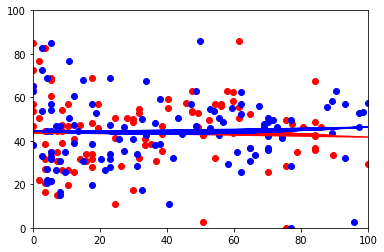

In [127]:
x1 = temp_df["Food"]
x2 = temp_df["Entertainment"]
y = temp_df["1 BHK Avg Rent"]


axes = plt.gca()
axes.set_xlim([0,100])
axes.set_ylim([0,100])

plt.scatter(x1,y,c="red")
plt.scatter(x2,y,c="blue")


a,b,c = np.polyfit(x1,y,2)
plt.plot(x1,a*x1**2+b*x1+c,c="red")

a,b,c = np.polyfit(x2,y,2)
plt.plot(x2,a*x2**2+b*x2+c,c="blue")

The relation between venue density and average rent of 1 BHK apartments has very little slope. This means that the rent only weakly depends on the venue density. If we look at food and entertainment categories separately, we observe:

1. Rent is slightly negatively related to availability of places that sell food

2. Rent has a little stronger and positive relation to entertainment venues

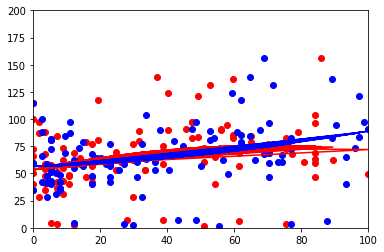

In [128]:
x1 = temp_df["Food"]
x2 = temp_df["Entertainment"]
y = temp_df["2 BHK Avg Rent"]


axes = plt.gca()
axes.set_xlim([0,100])
axes.set_ylim([0,200])

plt.scatter(x1,y,c="red")
plt.scatter(x2,y,c="blue")

a,b,c = np.polyfit(x1,y,2)
plt.plot(x1,a*x1**2+b*x1+c,c="red")

a,b,c = np.polyfit(x2,y,2)
plt.plot(x2,a*x2**2+b*x2+c,c="blue")

The relation between venue density and average rent of 2 BHK apartments has a comparatively steeper slope. This means that the rent depends more strongly on the venue density. If we look at food and entertainment categories separately, we observe:

1. Rent is weakly and positively related to availability of places that sell food

2. Rent has a little stronger and positive relation to entertainment venues

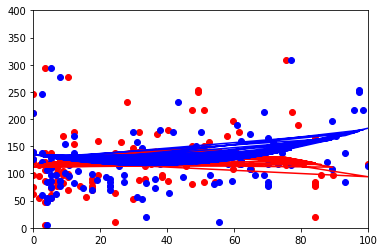

In [129]:
x1 = temp_df["Food"]
x2 = temp_df["Entertainment"]
y = temp_df["3 BHK Avg Rent"]


axes = plt.gca()
axes.set_xlim([0,100])
axes.set_ylim([0,400])

plt.scatter(x1,y,c="red")
plt.scatter(x2,y,c="blue")

a,b,c = np.polyfit(x1,y,2)
plt.plot(x1,a*x1**2+b*x1+c,c="red")

a,b,c = np.polyfit(x2,y,2)
plt.plot(x2,a*x2**2+b*x2+c,c="blue")

The relation between venue density and average rent of 3 BHK apartments has a weaker slope than that of 2 BHK apartments, but steeper than that of 1 BHK apartments.
If we look at food and entertainment categories separately, we observe:

1. Rent is negatively related to availability of places that sell food

2. Rent has a positive relation to entertainment venues

### Calculating Cost-Effectiveness

The cost-effectiveness will be calculated for all 3 types of rent according to the following formula:

    Service Score = sqrt( food^2  + entertainment ^2 )
    Rent Score = rent/10
    Cost Effectiveness = Service Score/Rent Score

In [138]:
rent_score_1 = df["1 BHK Avg Rent"].copy()
rent_score_2 = df["2 BHK Avg Rent"].copy()
rent_score_3 = df["3 BHK Avg Rent"].copy()

In [139]:
service_1 = df["Food"].copy()
service_2 = df["Entertainment"].copy()
service_score = []

for i in range(0,len(df)):
    service_score.append((service_1[i]**2 + service_2[i]**2)**0.5)

In [140]:
co_ef_1 = []
co_ef_2 = []
co_ef_3 = []

for i in range(0,len(df)):
    co_ef_1.append(service_score[i]/(rent_score_1[i]/10))
    co_ef_2.append(service_score[i]/(rent_score_2[i]/10))
    co_ef_3.append(service_score[i]/(rent_score_3[i]/10))

In [143]:
co_ef_matrix = pd.DataFrame()
co_ef_matrix["Locality"] = df["Locality"].copy()
co_ef_matrix["1 BHK Score"] = co_ef_1
co_ef_matrix["2 BHK Score"] = co_ef_2
co_ef_matrix["3 BHK Score"] = co_ef_3
co_ef_matrix.head()

,Locality,1 BHK Score,2 BHK Score,3 BHK Score
0,HSR Layout,0.030641,0.020270,0.092568
1,Koramangala,0.000000,0.000000,0.000000
2,Whitefield,0.032293,0.023614,0.116047
3,Begur,0.005208,0.003406,0.002262
4,Varthur,0.005089,0.003106,0.000604


The cost effectiveness score is in fractions, so it is scaled up for better comprehension

In [144]:
co_ef_matrix = co_ef_matrix*100
co_ef_matrix["Locality"] = df["Locality"].copy()
co_ef_matrix.head()

,Locality,1 BHK Score,2 BHK Score,3 BHK Score
0,HSR Layout,3.064056,2.026975,9.256845
1,Koramangala,0.000000,0.000000,0.000000
2,Whitefield,3.229288,2.361432,11.604749
3,Begur,0.520833,0.340570,0.226244
4,Varthur,0.508949,0.310565,0.060434


Now, sorting the localities in decreasing order of cost-effectiveness

In [145]:
co_ef_matrix.sort_values(['1 BHK Score','2 BHK Score','3 BHK Score'],ascending = [False,False,False], inplace = True)
co_ef_matrix.head()

,Locality,1 BHK Score,2 BHK Score,3 BHK Score
57,Basavanagudi,82.384622,3.757909,2.420348
9,Bellandur,49.851279,3.994489,1.394440
18,Electronic City Phase 1,9.196081,2.364706,1.947405
79,Frazer Town,8.925035,3.320943,0.920107
21,Banashankari,8.768452,5.371807,2.366860


## Results and Discussion <a name="results"></a>

The above analysis shows that while weak, there is some co-relation between rent of an apartment and availability of services. The value of rent does not have a determined behaviour when plotted against food selling venues. However, it does show a positive dependence on the density of nearby entertainment venues. This means that entertainment services such as malls, theatres, and bars have a greater hand in increasing the rent of a place, since the availability of these places creates a higher demand for nearby homes, and people are willing to pay a little more to live in these areas. The result backs the introductory statement that people are willing to pay a higher rent to have more amenities in a small radius from home. A reverse conclusion can also be drawn from this: If there aren't many services nearby, the rent of a place will automatically decrease.


The cost-effectiveness matrix shows that the most cost-effective locality, i.e. the locality with the highest service score by rent score is Basavanagudi. A person can get more amenities in this area for a lower rent.

## Conclusion <a name="conclusion"></a>

In this project, we studied the dependence of the rent of an apartment in Bangalore on the availability of services nearby. The localities were taken from Makaan.com, and their locations were retrieved using geopy. After removing empty values, the Foursquare API was used to obtain all the available services within a 2km range from the location coordinates. The rent and venue data were normalized using min-max normalization, and the service and cost scores were calculated, which would be used to calculate the cost-effectiveness of living in a certain area.

Some conclusions were also drawn from the rent-service plot which showed a positive dependency of rent on entertainment venue density. The cost-effectiveness matrix was sorted in descending order to show the most cost-effective locality in Bangalore.